In [2]:
from __future__ import division
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl 
import numpy as np
import re

In [59]:
df = pd.read_csv("swbd_nocntxt.csv")

In [62]:
# This makes the display show more info
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [63]:
df = df.drop(columns="SentenceParse")

In [69]:
df.Sentence.iloc[0]

'uh, first, um, i need *-1 to know, uh, how do you feel *t*-2 about, uh, about * sending, uh, an elderly, uh, family member to a nursing home?'

In [32]:
df.groupby(["QuestionType","ModalPresent"])["QuestionType"].count()

QuestionType  ModalPresent
adjunct       no              1399
              yes               80
embadjunct    no               165
              yes               19
embedded      no              4417
              yes              444
exclamation   no                26
fragment      no                 4
relative      no              1299
              yes              216
root          no              1606
              yes              174
subject       no               319
              yes               31
Name: QuestionType, dtype: int64

In [24]:
len(df[(df["QuestionType"]=="embedded") & (df["ModalPresent"]=="yes")])

444

In [49]:
df.pivot_table(index=['QuestionType'], values="Sentence", aggfunc=len).groupby(["QuestionType"]).Sentence.transform(lambda x: x/len(df)).reset_index()

,QuestionType,Sentence
0,adjunct,0.145014
1,embadjunct,0.018041
2,embedded,0.476615
3,exclamation,0.002549
4,fragment,0.000392
5,relative,0.148544
6,root,0.174527
7,subject,0.034317


No handles with labels found to put in legend.


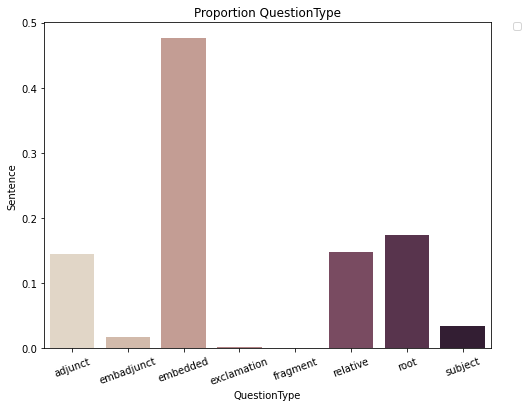

In [50]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x="QuestionType",y="Sentence", palette="ch:.25", data=df_pt)
g.set_title("Proportion QuestionType")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20)
plt.show()

In [51]:
df_mod_pt = df.pivot_table(index=['QuestionType','ModalPresent'], values="Sentence", aggfunc=len).groupby(["QuestionType"]).Sentence.transform(lambda x: x/len(df)).reset_index()

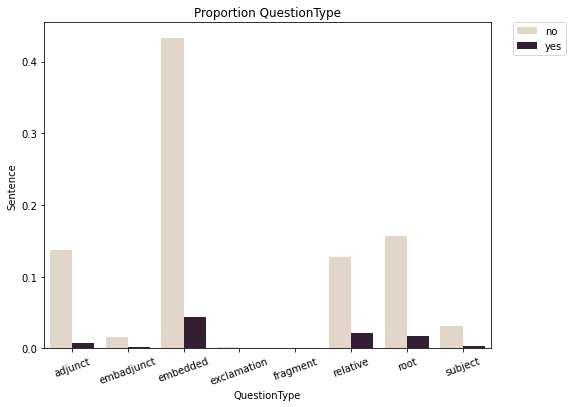

In [55]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x="QuestionType",y="Sentence", hue="ModalPresent", palette="ch:.25", data=df_mod_pt)
g.set_title("Proportion QuestionType")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20)
plt.show()

In [56]:
df_fin_pt = df.pivot_table(index=['QuestionType','Finite'], values="Sentence", aggfunc=len).groupby(["QuestionType"]).Sentence.transform(lambda x: x/len(df)).reset_index()

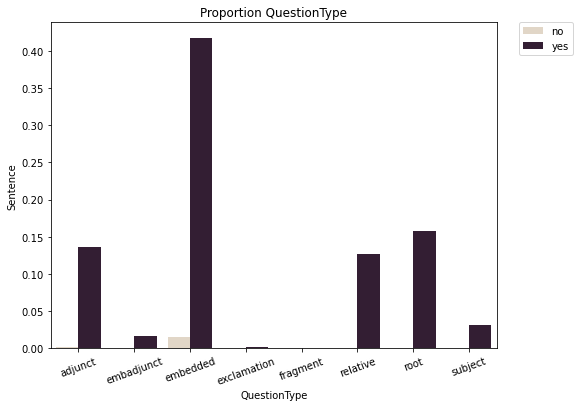

In [58]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x="QuestionType",y="Sentence", hue="Finite", palette="ch:.25", data=df_fin_pt)
g.set_title("Proportion QuestionType")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20)
plt.show()

# Just Root and Embedded